In [26]:
import altair as alt
import pandas as pd

In [27]:
xl = pd.ExcelFile("data/SCFP2016.xlsx")
xl.sheet_names

df = xl.parse("SCFP2016")
df = df[['INCOME', 'WGT', 'AGE', 'WAGEINC', 'NETWORTH']]
df.head()

INCOME          WGT  AGE  WAGEINC  NETWORTH
0  13164.273406  6427.136675   71      0.0  176720.0
1  13164.273406  6428.350592   71      0.0  176830.0
2  13164.273406  6414.477294   71      0.0  176730.0
3  13164.273406  6428.487972   71      0.0  176730.0
4  13164.273406  6425.256822   71      0.0  176830.0

In [28]:
from altair import pipe, limit_rows, to_values
t = lambda data: pipe(data, limit_rows(max_rows=35000), to_values)
alt.data_transformers.register('custom', t)
alt.data_transformers.enable('custom')

DataTransformerRegistry.enable('custom')

In [63]:
from altair import *

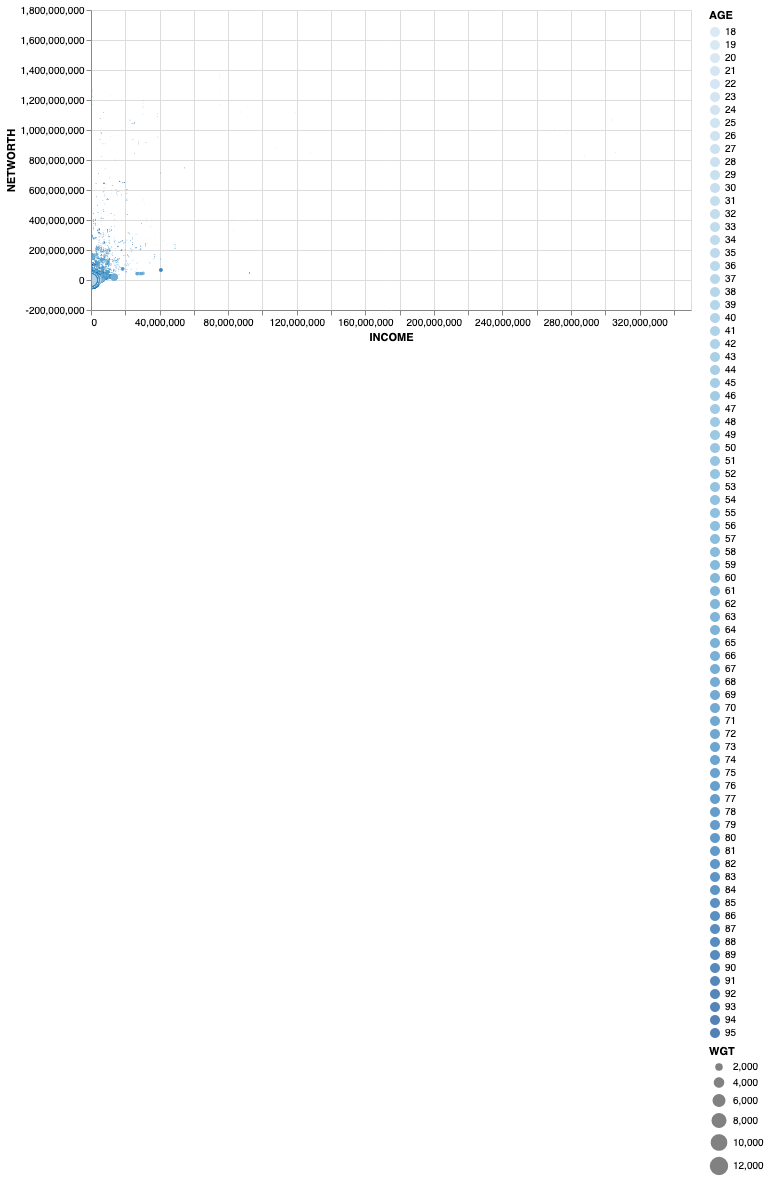

In [73]:
alt.Chart(df).mark_point().encode(
    x='INCOME',
    y='NETWORTH',
    color='AGE',
)

scatter = alt.Chart(df).mark_circle().encode(
    alt.Y('NETWORTH:Q', scale=alt.Scale(base=10)),
    alt.X('INCOME:Q', scale=alt.Scale(base=10)),
    size=alt.Size('WGT:Q'),
    color=alt.Color('AGE:O'),
    tooltip=['AGE:O','INCOME:Q', 'NETWORTH:Q'],
).properties(
    width=600,
    height=300
).interactive()


scatter.save('income-wealth.html')
scatter